## Importing Dependecies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    print(gpu)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


## Reading Data

In [3]:
df = pd.read_csv('datasets/Reviews.csv')
df = df.head(500)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

## EDA

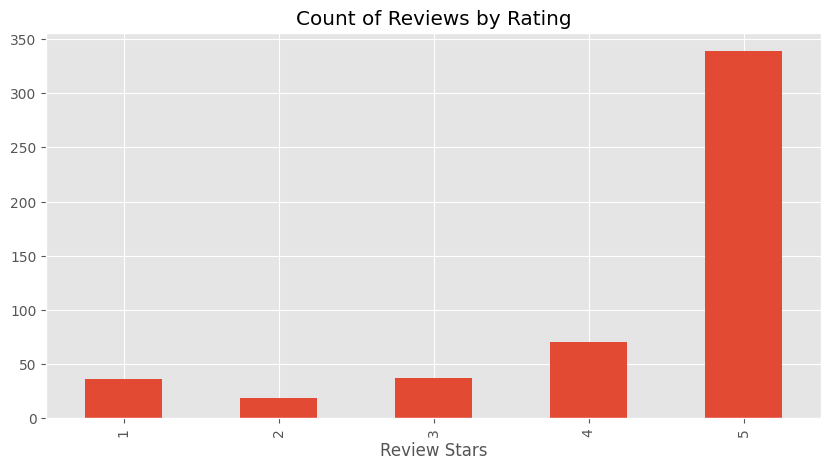

In [5]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar', 
                                             title= 'Count of Reviews by Rating',
                                             figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

## NLTK 

In [6]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [7]:
print(nltk.word_tokenize(example))

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft', ',', 'I', 'do', "n't", 'like', 'it', '.', 'Quaker', 'Oats', 'is', 'the', 'way', 'to', 'go', '.']


In [8]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [9]:
# Part Of Speech
tagged = nltk.pos_tag(tokens)
print(tagged)

[('This', 'DT'), ('oatmeal', 'NN'), ('is', 'VBZ'), ('not', 'RB'), ('good', 'JJ'), ('.', '.'), ('Its', 'PRP$'), ('mushy', 'NN'), (',', ','), ('soft', 'JJ'), (',', ','), ('I', 'PRP'), ('do', 'VBP'), ("n't", 'RB'), ('like', 'VB'), ('it', 'PRP'), ('.', '.'), ('Quaker', 'NNP'), ('Oats', 'NNPS'), ('is', 'VBZ'), ('the', 'DT'), ('way', 'NN'), ('to', 'TO'), ('go', 'VB'), ('.', '.')]


In [10]:
entites = nltk.chunk.ne_chunk(tagged)
entites.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## Vader Scoring

VADER (Valence Aware Dictionary and sEntiment Reasoner) is used to score words to give a value which is either pos/neg/neu.
1. Stop words are removed
2. Each word is scored and combined to a total score

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [12]:
sia.polarity_scores('I wanna kill myself')

{'neg': 0.701, 'neu': 0.299, 'pos': 0.0, 'compound': -0.6908}

In [13]:
sia.polarity_scores('''I drape my right leg over her legs, holding her in place. I’ve wanted to do this since she asked me if I was gay. ‘Put your hands up on either side of your head,’ I order and she complies immediately… With great care—relishing the deed—I tug down her sweatpants. Her beautiful behind is naked and ready for me. As I place my hand on her backside, she tenses every muscle in her body … waiting. Her skin is soft to the touch and I sweep my palm across both cheeks, fondling each. She has a fine, fine ass.''')

{'neg': 0.051, 'neu': 0.787, 'pos': 0.162, 'compound': 0.8979}

In [14]:
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [15]:
# Running the Polarity score on the dataset 
for i in range(df.shape[0]):
    print(sia.polarity_scores(df['Text'][i]))

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}
{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664}
{'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468}
{'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}
{'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346}
{'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487}
{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313}
{'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}
{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579}
{'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296}
{'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466}
{'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486}
{'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.5719}
{'neg': 0.097, 'neu':

In [16]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [17]:
# .T used to flip the dataframe 
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns= {'index' : 'Id'})
vaders.head()

,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468


In [18]:
vaders = vaders.merge(df, how='left')
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Plotting Vader Results

C:\Users\joshu\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\joshu\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\joshu\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


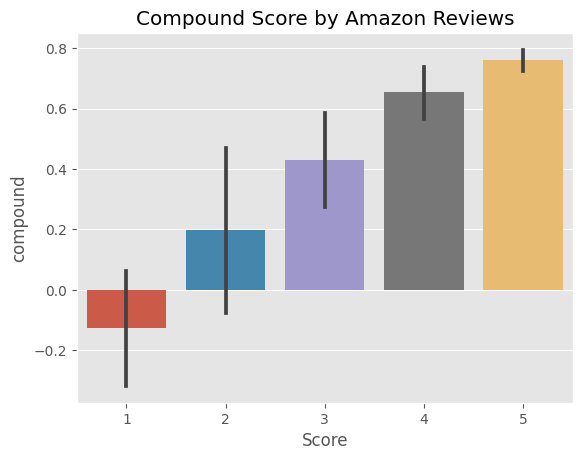

In [19]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Reviews')
plt.show()

C:\Users\joshu\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\joshu\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\joshu\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\joshu\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

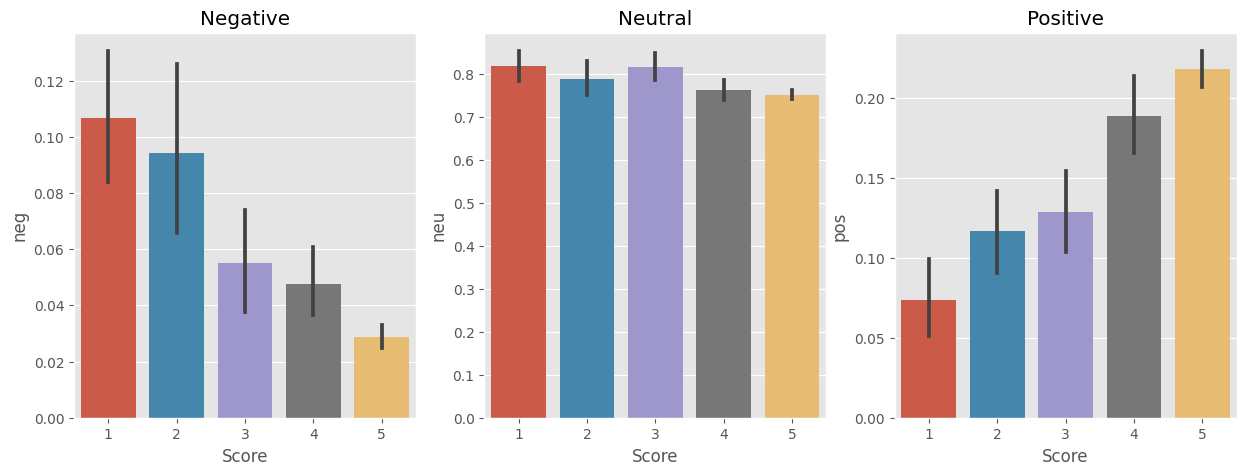

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[2])
axs[0].set_title('Negative')
axs[1].set_title('Neutral')
axs[2].set_title('Positive')
plt.show()

## Roberta Pretrained Model (State of The Art Model)
- Using a pre trained model on a large corpus of data
- Transformer model also takes into consideration of the words being used with the context of the sentence. This includes sarcasm.

In [21]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [23]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [24]:
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [25]:
# Run Roberta Model for Example
encoded_text = tokenizer(example, return_tensors='pt')

In [26]:
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
# scores = softmax(scores)
scores_dict = {
    'neg': scores[0],
    'neu': scores[1],
    'pos': scores[2]
}
print(scores_dict)

{'neg': 3.1436293, 'neu': -0.7106685, 'pos': -2.6558964}


In [27]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'rob_neg': scores[0],
        'rob_neu': scores[1],
        'rob_pos': scores[2]
    }
    return scores_dict

In [28]:
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    roberta_result = polarity_scores_roberta(text)
    break

  0%|          | 0/500 [00:00<?, ?it/s]

In [29]:
vader_result

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

In [30]:
roberta_result

{'rob_neg': 0.009624252, 'rob_neu': 0.049980428, 'rob_pos': 0.9403953}

In [31]:
{**vader_result, **roberta_result}

{'neg': 0.0,
 'neu': 0.695,
 'pos': 0.305,
 'compound': 0.9441,
 'rob_neg': 0.009624252,
 'rob_neu': 0.049980428,
 'rob_pos': 0.9403953}

In [32]:
res = {}
for i, row in tqdm(df.iterrows(), total= len(df)):
    try:
        text = row['Text']
        id = row['Id']
        
        vader_res_rename = {}
        vader_res = sia.polarity_scores(text)
        for key, value in vader_res.items():
            vader_res_rename[f"vad_{key}"] = value 
            
        roberta_res  = polarity_scores_roberta(text)
        
        both = {**vader_res_rename, **roberta_res}
        res[id] = both
    except Exception as e:
        print(f'Broke for ID: {id}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for ID: 83
Broke for ID: 187


In [34]:
res

{1: {'vad_neg': 0.0,
  'vad_neu': 0.695,
  'vad_pos': 0.305,
  'vad_compound': 0.9441,
  'rob_neg': 0.009624252,
  'rob_neu': 0.049980428,
  'rob_pos': 0.9403953},
 2: {'vad_neg': 0.138,
  'vad_neu': 0.862,
  'vad_pos': 0.0,
  'vad_compound': -0.5664,
  'rob_neg': 0.5089861,
  'rob_neu': 0.45241353,
  'rob_pos': 0.038600344},
 3: {'vad_neg': 0.091,
  'vad_neu': 0.754,
  'vad_pos': 0.155,
  'vad_compound': 0.8265,
  'rob_neg': 0.0032288984,
  'rob_neu': 0.09806744,
  'rob_pos': 0.8987037},
 4: {'vad_neg': 0.0,
  'vad_neu': 1.0,
  'vad_pos': 0.0,
  'vad_compound': 0.0,
  'rob_neg': 0.0022951285,
  'rob_neu': 0.09021923,
  'rob_pos': 0.90748566},
 5: {'vad_neg': 0.0,
  'vad_neu': 0.552,
  'vad_pos': 0.448,
  'vad_compound': 0.9468,
  'rob_neg': 0.0016347291,
  'rob_neu': 0.01030247,
  'rob_pos': 0.98806286},
 6: {'vad_neg': 0.029,
  'vad_neu': 0.809,
  'vad_pos': 0.163,
  'vad_compound': 0.883,
  'rob_neg': 0.006129598,
  'rob_neu': 0.021795882,
  'rob_pos': 0.97207445},
 7: {'vad_neg': 0